## POLYNOMIAL

In [ ]:
# testing GPU on a polynomial model with torch-gpu  
import torch
import torch.nn

In [114]:
class polynomial(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.a=torch.nn.Parameter(torch.randn(1))
        self.b=torch.nn.Parameter(torch.randn(1))
        self.c=torch.nn.Parameter(torch.randn(1))
        self.d=torch.nn.Parameter(torch.randn(1))
    
    def forward(self, x):
        return self.a + self.b * x + self.c * x **2 + self.d * x **3
    
    def string(self):
        return f"y={self.a}+{self.b}x+{self.c}*x^2+{self.d}x^3"
    

x=torch.linspace(-torch.math.pi,torch.math.pi,1000).to(device)
y=torch.sin(x).to(device)
model=polynomial().to(device)
criterion=torch.nn.MSELoss(reduction="sum")
optimizer=torch.optim.Adam(model.parameters(),lr=1e-3)


    




        
        
        
        

In [116]:
for epoch in range(10000):
    y_pred = model(x)
    loss=criterion(y_pred,y)
    if epoch % 100==99:
        print(epoch,loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
        
    
print(f"result {model.string()}")        

99 6.969268798828125
199 6.199727535247803
299 5.639310359954834
399 5.2392497062683105
499 4.959591388702393
599 4.768375396728516
699 4.640639305114746
799 4.557376861572266
899 4.5044846534729
999 4.47178840637207
1099 4.452142715454102
1199 4.440690040588379
1299 4.434223175048828
1399 4.430689811706543
1499 4.428827285766602
1599 4.42788028717041
1699 4.427418231964111
1799 4.427201747894287
1899 4.427104473114014
1999 4.42706298828125
2099 4.427045822143555
2199 4.427040100097656
2299 4.427036762237549
2399 4.427035808563232
2499 4.427035331726074
2599 4.427035331726074
2699 4.427035808563232
2799 4.427036285400391
2899 4.427035331726074
2999 4.427035331726074
3099 4.427035331726074
3199 4.42704963684082
3299 4.427035808563232
3399 4.427035331726074
3499 4.427035331726074
3599 4.427038669586182
3699 4.427036285400391
3799 4.427036285400391
3899 4.427035808563232
3999 4.427035331726074
4099 4.4272613525390625
4199 4.427035331726074
4299 4.427035331726074
4399 4.427036285400391
449

## MNIST

In [165]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor,Normalize,Compose
import matplotlib.pyplot as plt 

In [211]:
transform=Compose([ToTensor(),Normalize((0.5,), (0.5,))])
training_data = datasets.FashionMNIST(root="data",train=True,transform=transform,download=True)
validation_data = datasets.FashionMNIST(root="data",train=False,transform=transform,download=True) 

In [212]:
training_data.__getitem__(1)[0].min()

tensor(-1.)

In [227]:
train_generator=DataLoader(training_data,batch_size=200,shuffle=True)
test_generator=DataLoader(validation_data,batch_size=200)

Shape of X [N, C, H, W]: torch.Size([200, 1, 28, 28])
Shape of y: torch.Size([200]) torch.int64


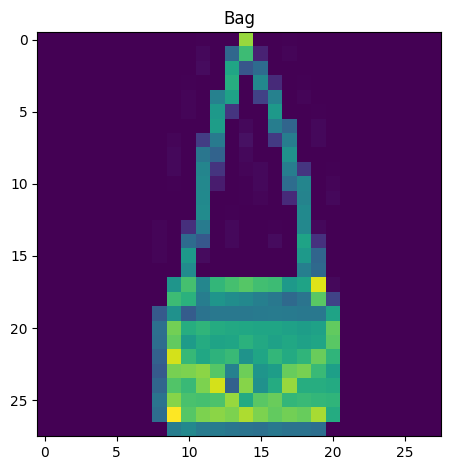

In [214]:
for x,y in train_generator:
    print(f"Shape of X [N, C, H, W]: {x.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

class_to_idx=training_data.class_to_idx
idx_to_class={idx:class_name for class_name,idx in class_to_idx.items()}
plt.imshow(x[0].squeeze(0))
plt.title(idx_to_class[int(y[0])])
plt.tight_layout()

In [215]:
idx_to_class

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

In [216]:
class_to_idx=training_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [218]:
class NeuralNetwork(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1=nn.Conv2d(in_channels=1,out_channels=32,kernel_size=3,padding=1)
        self.conv2=nn.Conv2d(in_channels=32,out_channels=64,kernel_size=3,padding=1)
        self.flatten=nn.Flatten()
        self.fc1=nn.Linear(in_features=64*7*7,out_features=128)
        self.fc2=nn.Linear(128,10)
        
    
    def forward(self,x):
        x=nn.functional.leaky_relu(self.conv1(x),negative_slope=.1)
        x=nn.functional.max_pool2d(x,kernel_size=2,stride=2)
        x=nn.functional.relu(self.conv2(x))
        x=nn.functional.max_pool2d(x,kernel_size=2,stride=2)
        x=self.flatten(x)
        x=nn.functional.relu(self.fc1(x))
        x=self.fc2(x)
        return x
    
model=NeuralNetwork().to(device)       
        


6

In [232]:
model

NeuralNetwork(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [220]:
criterion=torch.nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=1e-4)

In [221]:
size=len(train_generator.dataset)
size


60000

In [222]:
def train(data_loader,model,criterion,optimizer):
    size=len(data_loader.dataset)
    num_batches=size//200
    model.train()
    for batch,(x,y) in enumerate(data_loader):
        
        pred=model(x)
        loss=criterion(pred,y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        if batch % 100 ==0:
            print(f"batch: {batch}/{num_batches} loss: {loss.item()}")
            

In [223]:
def test(data_loader,model,criterion):
    size=len(data_loader.dataset)
    num_batches=len(data_loader)
    model.eval()
    test_loss,correct=0,0
    with torch.no_grad():
        for x,y in data_loader:
            x,y=x.to(device),y.to(device)
            pred=model(x)
            test_loss+=criterion(pred,y).item()
            correct+= (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss/=num_batches
    correct/=size
    print(f"accuracy: {correct} test_loss at {test_loss} ")
        
            
            

In [228]:
epochs=20
for epoch in range(epochs):
    train(train_generator,criterion=criterion,optimizer=optimizer,model=model)
    test(test_generator,criterion=criterion,model=model)
print("done")    

batch: 0/300 loss: 0.44278237223625183
batch: 100/300 loss: 0.4943397641181946
batch: 200/300 loss: 0.5207823514938354
accuracy: 0.8372 test_loss at 0.4611566609144211 
batch: 0/300 loss: 0.4322832524776459
batch: 100/300 loss: 0.43476545810699463
batch: 200/300 loss: 0.30429375171661377
accuracy: 0.8495 test_loss at 0.42192032098770144 
batch: 0/300 loss: 0.3661339581012726
batch: 100/300 loss: 0.2959492802619934
batch: 200/300 loss: 0.46886149048805237
accuracy: 0.8565 test_loss at 0.39933603644371035 
batch: 0/300 loss: 0.3831086754798889
batch: 100/300 loss: 0.41292789578437805
batch: 200/300 loss: 0.30032581090927124
accuracy: 0.866 test_loss at 0.37601468980312347 
batch: 0/300 loss: 0.33495885133743286
batch: 100/300 loss: 0.4491446018218994
batch: 200/300 loss: 0.2653273046016693
accuracy: 0.8692 test_loss at 0.3710410124063492 
batch: 0/300 loss: 0.29818272590637207
batch: 100/300 loss: 0.2703956961631775
batch: 200/300 loss: 0.34394320845603943
accuracy: 0.8745 test_loss at 0

In [231]:

torch.save(model,"mnist.pth")